In [184]:
# Import the FOOOF object
from fooof import FOOOF
from fooof import FOOOFGroup

# Import a utility to download and load example data
from fooof.utils.download import load_fooof_data
from math import floor
import mne
import numpy as np
import os
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from spiketools.plts.utils import make_axes
import seaborn as sns
import imagesc as imagesc

import glob

In [185]:
# get all stages files
path_stage = '/home/b1044271/EEGsleep/SleepStaging/*.txt'
stage_files = glob.glob(path_stage)

Trns_mat = np.ones([17,25])


In [186]:
i = 0
for file in stage_files:
   
    files  = pd.read_csv(file)
    stages = list(files.iloc[:,0])
    
    # Go through the staging files and get the index of all the stags then find the next stage

    N1_o = [i for i in range(len(stages)) if stages[i] == 1]
    N1_l = np.array(stages)[np.array([i + 1 for i in N1_o[0:-2]])]

    N2_o = [i for i in range(len(stages)) if stages[i] == 2]
    N2_l = np.array(stages)[np.array([i + 1 for i in N2_o[0:-2]])]

    N3_o = [i for i in range(len(stages)) if stages[i] == 3]
    N3_l = np.array(stages)[np.array([i + 1 for i in N3_o[0:-2]])]

    R_o = [i for i in range(len(stages)) if stages[i] == 5]
    R_l = np.array(stages)[np.array([i + 1 for i in R_o[0:-2]])]

    W_o = [i for i in range(len(stages)) if stages[i] == 0]
    W_l = np.array(stages)[np.array([i + 1 for i in W_o[0:-2]])]
    
    # Go through the epochs and get the transitions
    R_trans  = np.ones([5,500]) * np.nan
    N1_trans = np.ones([5,500]) * np.nan
    N2_trans = np.ones([5,500]) * np.nan
    N3_trans = np.ones([5,500]) * np.nan
    W_trans  = np.ones([5,500]) * np.nan

    X = [1,2,3,5,0]

    ii=0
    for S in X:
        N1_trans[ii,0:len([i for i in range(len(N1_l)) if N1_l[i] == S])] = [i for i in range(len(N1_l)) if N1_l[i] == S]
        N2_trans[ii,0:len([i for i in range(len(N2_l)) if N2_l[i] == S])] = [i for i in range(len(N2_l)) if N2_l[i] == S]
        N3_trans[ii,0:len([i for i in range(len(N3_l)) if N3_l[i] == S])] = [i for i in range(len(N3_l)) if N3_l[i] == S]
        R_trans[ii,0:len([i for i in range(len(R_l)) if R_l[i] == S])] = [i for i in range(len(R_l)) if R_l[i] == S]
        W_trans[ii,0:len([i for i in range(len(W_l)) if W_l[i] == S])] = [i for i in range(len(W_l)) if W_l[i] == S]

        ii=ii+1
        
    N1_t = [np.sum(~np.isnan(N1_trans[4]))/len(N1_l), np.sum(~np.isnan(N1_trans[3]))/len(N1_l), np.sum(~np.isnan(N1_trans[0]))/len(N1_l),
            np.sum(~np.isnan(N1_trans[1]))/len(N1_l), np.sum(~np.isnan(N1_trans[2]))/len(N1_l)]

    N2_t = [np.sum(~np.isnan(N2_trans[4]))/len(N2_l), np.sum(~np.isnan(N2_trans[3]))/len(N2_l), np.sum(~np.isnan(N2_trans[0]))/len(N2_l),
            np.sum(~np.isnan(N2_trans[1]))/len(N2_l),np.sum(~np.isnan(N2_trans[2]))/len(N2_l)]

    N3_t = [np.sum(~np.isnan(N3_trans[4]))/len(N3_l), np.sum(~np.isnan(N3_trans[3]))/len(N3_l), np.sum(~np.isnan(N3_trans[0]))/len(N3_l),
            np.sum(~np.isnan(N3_trans[1]))/len(N3_l),np.sum(~np.isnan(N3_trans[2]))/len(N3_l)]

    R_t = [np.sum(~np.isnan(R_trans[4]))/len(R_l), np.sum(~np.isnan(R_trans[3]))/len(R_l), np.sum(~np.isnan(R_trans[0]))/len(R_l),
            np.sum(~np.isnan(R_trans[1]))/len(R_l), np.sum(~np.isnan(R_trans[2]))/len(R_l)]

    W_t = [np.sum(~np.isnan(W_trans[4]))/len(W_l), np.sum(~np.isnan(W_trans[3]))/len(W_l), np.sum(~np.isnan(W_trans[0]))/len(W_l),
            np.sum(~np.isnan(W_trans[1]))/len(W_l), np.sum(~np.isnan(W_trans[2]))/len(W_l)]
    
    Trns_mat[i,:] = np.concatenate((W_t,R_t,N1_t,N2_t,N3_t),axis=0)
    i = i+1


In [187]:
stages

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 3,
 3,
 3,
 5,
 5,
 5,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 0,
 0,
 1,
 2,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 1,
 2,


In [174]:
Trns_mean = np.mean(Trns_mat, axis = 0)


In [175]:
Trns_mean_final = np.reshape(Trns_mean,(5,5))
Trns_mean_final

array([[76.56665554,  0.66663338, 19.37566413,  3.07514281,  0.31590414],
       [ 0.90861306, 96.59308953,  1.4017541 ,  1.09654331,  0.        ],
       [ 7.0016793 ,  2.55266864, 42.85477102, 46.75171204,  0.839169  ],
       [ 2.11357582,  1.15068464,  5.53188166, 84.26925617,  6.9346017 ],
       [ 0.80965312,  0.13499688,  0.73333815,  6.35087687, 91.97113499]])

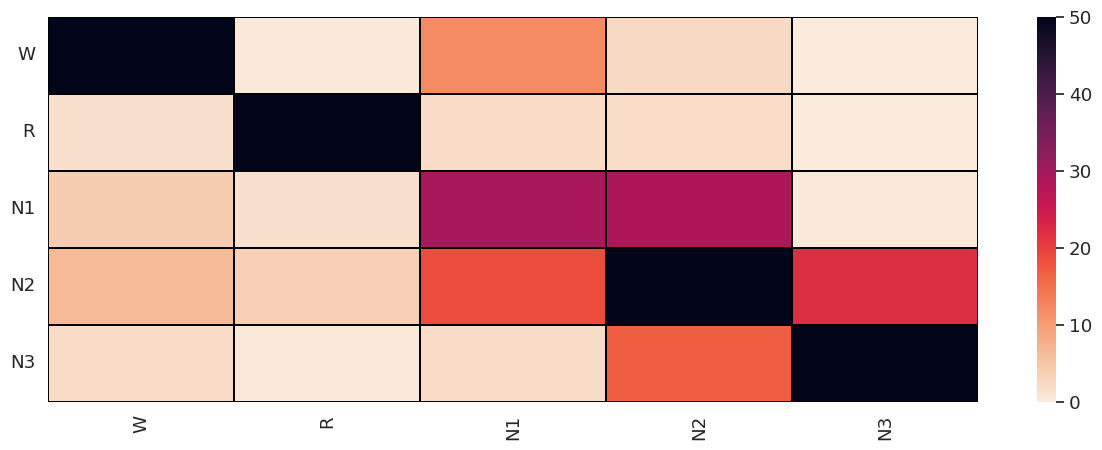

<Figure size 640x480 with 0 Axes>

In [183]:
# Now the arrays are ready for plotting 
data_s = pd.DataFrame(X2,columns=['W','R','N1','N2','N3'], index=['W','R','N1','N2','N3'])
fig, ax = imagesc.seaborn(data_s.values, data_s.index.values, data_s.columns.values,
                          cmap='rocket_r', vmin=0, vmax=50)

plt.savefig("Group_Transitions_stage.svg", dpi = 600 )